# Data Connection

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('retail_sale_data.csv')
df

,Date,Product,Quantity Sold,Unit Price,Region
0,2023-04-07 08:43:24,Headphones,-1,417.70,East
1,2023-12-10 08:30:39,Headphones,10,678.68,South
2,2023-07-31 08:40:21,Laptop,15,257.30,South
3,2023-01-26 15:18:24,Tablet,-2,320.09,West
4,2023-03-01 16:41:39,Charger,7,965.76,East
...,...,...,...,...,...
95,2023-12-23 16:36:58,Laptop,-2,717.55,South
96,2023-02-24 18:09:24,Laptop,8,474.80,East
97,NaN,Charger,6,461.45,West
98,2023-07-18 18:47:32,Headphones,17,907.35,West


# Data Cleaning

In [5]:

# Handle missing values
df = df.dropna()  # or use df.fillna() with appropriate values

# Correct inconsistencies
df['Quantity Sold'] = df['Quantity Sold'].apply(lambda x: abs(x) if x < 0 else x)
#A lambda function is a small anonymous function that can have any number of arguments, but can only have one expression. 

df['Unit Price'] = df['Unit Price'].apply(lambda x: abs(x))

# Standardize date format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
#This is a Pandas function that converts an argument (usually a string or a series of strings) to datetime.

# '%Y': Year with century as a decimal number (e.g., 2023).
# '%y': Year without century as a zero-padded decimal number (e.g., 23).
# '%m': Month as a zero-padded decimal number (01, 02, ..., 12).
# '%d': Day of the month as a zero-padded decimal number (01, 02, ..., 31).
# '%H': Hour (24-hour clock) as a zero-padded decimal number (00, 01, ..., 23).
# '%I': Hour (12-hour clock) as a zero-padded decimal number (01, 02, ..., 12).
# '%M': Minute as a zero-padded decimal number (00, 01, ..., 59).
# '%S': Second as a zero-padded decimal number (00, 01, ..., 59).
# '%f': Microsecond as a decimal number, zero-padded on the left (000000 - 999999).
# '%p': Locale’s equivalent of either AM or PM.

# Data Manipulation

In [6]:
# Create a 'Total Sales' column
df['Total Sales'] = df['Quantity Sold'] * df['Unit Price']

# Group by 'Product' and calculate total quantity sold
total_quantity_by_product = df.groupby('Product')['Quantity Sold'].sum()

# Extract 'Month' from 'Date'
df['Month'] = df['Date'].dt.month


# Data Visualization

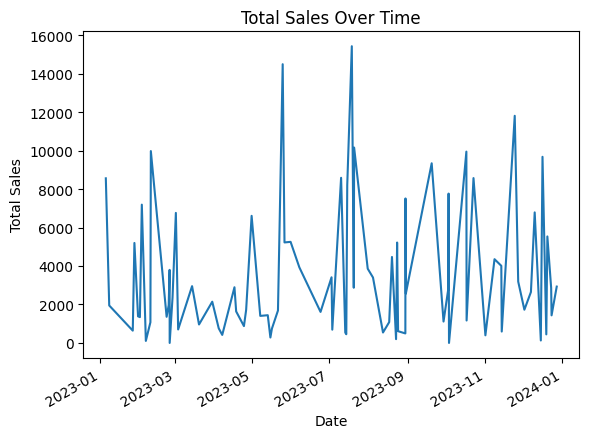

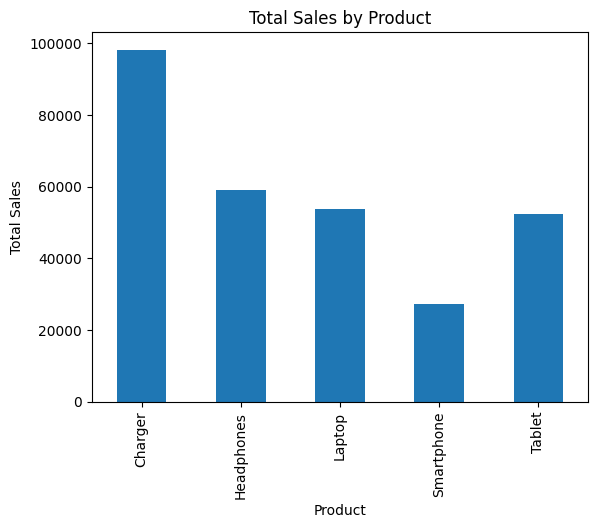

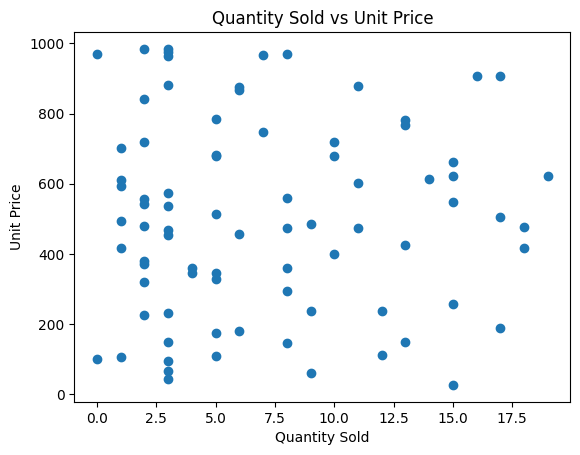

In [7]:
import matplotlib.pyplot as plt

# Line plot showing total sales over time
df.groupby('Date')['Total Sales'].sum().plot(kind='line')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

# Bar chart displaying total sales for each product
df.groupby('Product')['Total Sales'].sum().plot(kind='bar')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

# Scatter plot for quantity sold vs unit price
plt.scatter(df['Quantity Sold'], df['Unit Price'])
plt.title('Quantity Sold vs Unit Price')
plt.xlabel('Quantity Sold')
plt.ylabel('Unit Price')
plt.show()
